# Transformers

* ax.transData -- the xlim and ylim of the axes
* ax.transAxes -- 0-to-1 (from left to right, or from bottom to top)
* fig.transFigure -- 0-to-1 (from left to right, or from bottom to top)
* None -- pixels ("dots" as in the acronym DPI)

/tmp/ipykernel_43587/3295241206.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_before = eur.centroid


<AxesSubplot:>

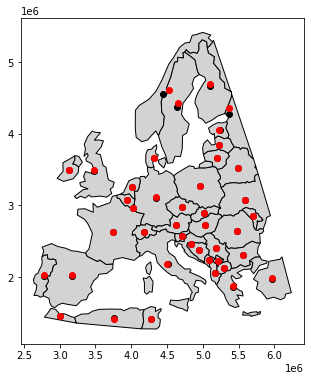

In [13]:
from shapely.geometry import Polygon, box, Point
import geopandas as gpd

# global GeoDataFrame
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path).set_index("name")

# Europe GeoSeries
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur = df.intersection(eur_window)
eur = eur[~eur.is_empty] # why filter?

# centroid -- which line causes the error?
centroids_before = eur.centroid
eur = eur.to_crs("EPSG:3035")
centroids_after = eur.centroid

# visualize
ax = eur.plot(color="lightgray", edgecolor="k", figsize=(12,6))
centroids_after.plot(ax=ax, color="k") # correct
centroids_before.to_crs(eur.crs).plot(ax=ax, color="r") # wrong

# Area

In [18]:
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur = df.intersection(eur_window)
eur = eur[~eur.is_empty]
#eur.area # wrong because it's degrees

eur2 = eur.to_crs("EPSG:3035")
eur2.area # caveat: this is only the area within the cropped window

sq_miles = eur2.area / 1000 / 1000 / 2.59
sq_miles.sort_values(ascending=False)

name
France              216045.735320
Spain               193941.416516
Sweden              173962.955903
Germany             138002.030052
Finland             131750.182704
Norway              126885.828356
Italy               121659.867544
Poland              119844.344075
Ukraine             110345.741832
United Kingdom       96519.589998
Romania              92025.972522
Turkey               85632.236650
Algeria              78882.882393
Belarus              78739.245551
Russia               78170.023756
Greece               50946.870966
Bulgaria             42554.046136
Portugal             36065.021674
Hungary              35704.295877
Austria              32842.862855
Czechia              31354.126319
Serbia               29493.813018
Tunisia              25280.702563
Latvia               24680.969176
Lithuania            24644.688797
Ireland              22568.405096
Croatia              22212.141886
Bosnia and Herz.     19538.365073
Slovakia             18172.796262
Switzerla

# Map of Madison with Fire and Police stations

72.0


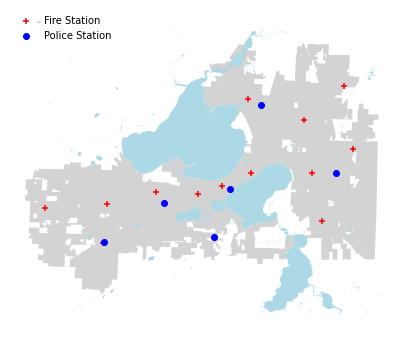

In [37]:
import matplotlib.pyplot as plt

# loading data
city = gpd.read_file("City_Limit.zip").to_crs("epsg:32616")
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(city.crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(city.crs)
police = gpd.read_file("Police_Stations.zip").to_crs(city.crs)

# plotting
ax = city.plot(color="lightgray", figsize=(7,7))
water.plot(color="lightblue", ax=ax)
fire.plot(color="red", ax=ax, marker="+", label="Fire Station")
police.plot(color="blue", ax=ax, label="Police Station")
ax.set_axis_off()
plt.legend(loc="upper left", frameon=False)
print(ax.get_figure().dpi)

ax.get_figure().savefig("low.png", dpi=20)
ax.get_figure().savefig("high.png", dpi=300)

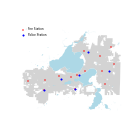

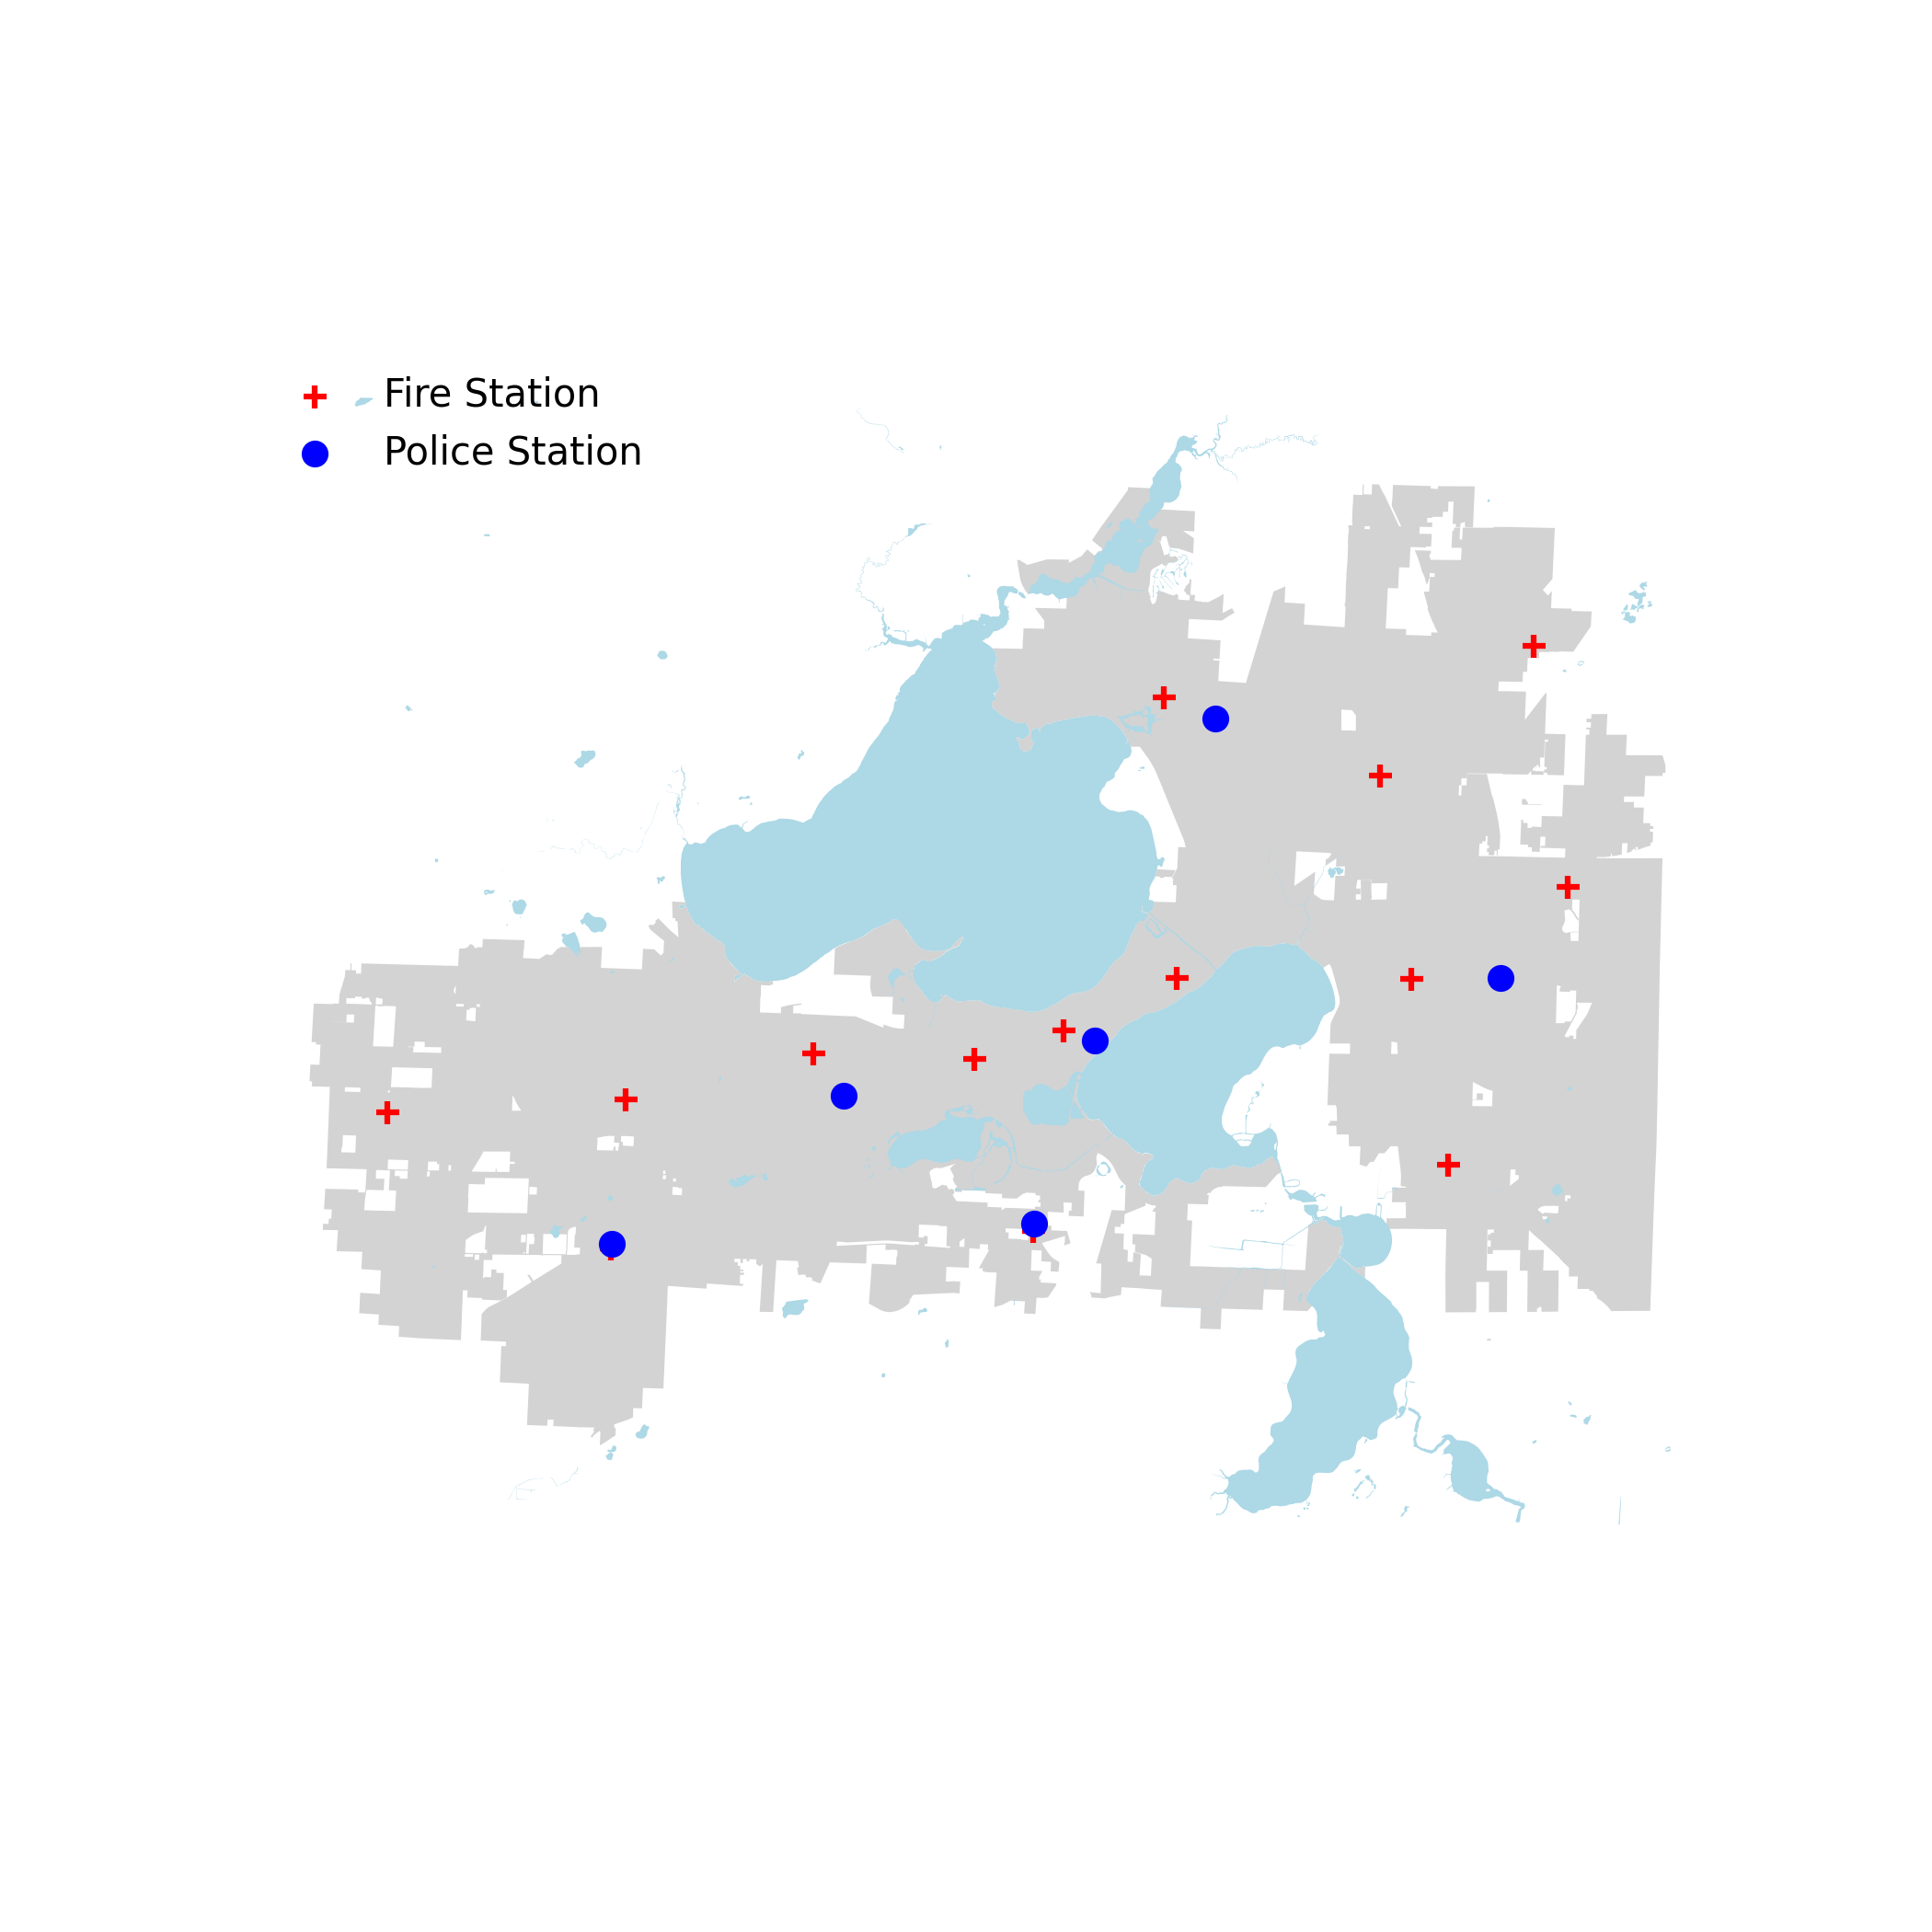

In [38]:
from IPython.core.display import Image, display

display(Image("low.png", width=600))
display(Image("high.png", width=600))

In [39]:
# 1. geographic computation: which fire stations are "near" a lake?

In [52]:
all_water = water.unary_union # merge shapes of all rows into one giant MultiPolygon
print(type(all_water))
#all_water

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [51]:
fire[fire.buffer(1000).intersects(all_water)]

,OBJECTID,MCD,EMS,LONG_NAME,SHORT_NAME,FIRE_STATI,FIRE_STA_1,COMMENT,ADDRESS,URL,geometry
0,40,CITY OF MADISON,Y,Fire Station # 7,# 7,7,A,Active,1810 McKenna Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (296500.973 4767501.373)
4,44,CITY OF MADISON,Y,Fire Station # 4,# 4,4,A,Active,1437 Monroe St,http://www.cityofmadison.com/fire/stations/sta...,POINT (303650.593 4771228.643)
5,45,CITY OF MADISON,N,Fire Station # 1,# 1,1,A,Active,316 W Dayton St,http://www.cityofmadison.com/fire/stations/sta...,POINT (305406.146 4771782.983)
6,46,CITY OF MADISON,Y,Fire Station # 3,# 3,3,A,Active,1217 Williamson St,http://www.cityofmadison.com/fire/stations/sta...,POINT (307618.590 4772815.951)
7,47,CITY OF MADISON,Y,Fire Station # 10,# 10,10,A,Active,1517 Troy Dr,http://www.cityofmadison.com/fire/stations/sta...,POINT (307367.543 4778324.864)
10,50,CITY OF MADISON,N,Fire Station # 11,# 11,11,A,Active,4011 Morgan Way,http://www.cityofmadison.com/fire/stations/sta...,POINT (314628.203 4779340.855)
13,53,CITY OF MADISON,N,Fire Station #14,# 14,14,P,Proposed,3218 Dairy Drive,None,POINT (312952.019 4769155.125)


<AxesSubplot:>

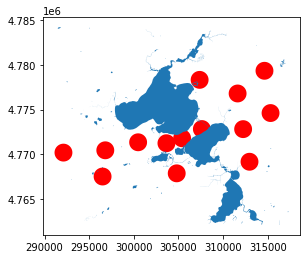

In [48]:
# which stations are near (<1KM) the water
ax = fire.buffer(1000).plot(color="red")
water.plot(ax=ax)

,OBJECTID,MCD,EMS,LONG_NAME,SHORT_NAME,FIRE_STATI,FIRE_STA_1,COMMENT,ADDRESS,URL,geometry
0,40,CITY OF MADISON,Y,Fire Station # 7,# 7,7,A,Active,1810 McKenna Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (296500.973 4767501.373)
4,44,CITY OF MADISON,Y,Fire Station # 4,# 4,4,A,Active,1437 Monroe St,http://www.cityofmadison.com/fire/stations/sta...,POINT (303650.593 4771228.643)
5,45,CITY OF MADISON,N,Fire Station # 1,# 1,1,A,Active,316 W Dayton St,http://www.cityofmadison.com/fire/stations/sta...,POINT (305406.146 4771782.983)
6,46,CITY OF MADISON,Y,Fire Station # 3,# 3,3,A,Active,1217 Williamson St,http://www.cityofmadison.com/fire/stations/sta...,POINT (307618.590 4772815.951)
7,47,CITY OF MADISON,Y,Fire Station # 10,# 10,10,A,Active,1517 Troy Dr,http://www.cityofmadison.com/fire/stations/sta...,POINT (307367.543 4778324.864)
10,50,CITY OF MADISON,N,Fire Station # 11,# 11,11,A,Active,4011 Morgan Way,http://www.cityofmadison.com/fire/stations/sta...,POINT (314628.203 4779340.855)
13,53,CITY OF MADISON,N,Fire Station #14,# 14,14,P,Proposed,3218 Dairy Drive,None,POINT (312952.019 4769155.125)


In [ ]:
# 2. how can we use GeoJSON, especially as part of web API

In [53]:
url = "https://opendata.arcgis.com/datasets/083601cab78d4051ad727ec3317fb6bc_1.geojson"
df = gpd.read_file(url)
df.head()

,OBJECTID,MCD,EMS,LONG_NAME,SHORT_NAME,FIRE_STATION_NO,FIRE_STATION_STATUS,COMMENT,ADDRESS,URL,geometry
0,40,CITY OF MADISON,Y,Fire Station # 7,# 7,7,A,Active,1810 McKenna Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (-89.49794 43.03294)
1,41,CITY OF MADISON,Y,Fire Station # 2,# 2,2,A,Active,421 Grand Canyon Dr,http://www.cityofmadison.com/fire/stations/sta...,POINT (-89.49529 43.05944)
2,42,CITY OF MADISON,N,Fire Station # 9,# 9,9,A,Active,201 N. Midvale Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (-89.45051 43.06849)
3,43,CITY OF MADISON,Y,Fire Station # 6,# 6,6,A,Active,825 West Badger Rd,http://www.cityofmadison.com/fire/stations/sta...,POINT (-89.39627 43.03833)
4,44,CITY OF MADISON,Y,Fire Station # 4,# 4,4,A,Active,1437 Monroe St,http://www.cityofmadison.com/fire/stations/sta...,POINT (-89.41157 43.06836)


In [54]:
df.to_file("mycopy.geojson")

In [55]:
df.to_file("mycopy.shp")

/tmp/ipykernel_43587/1344334088.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file("mycopy.shp")


<AxesSubplot:>

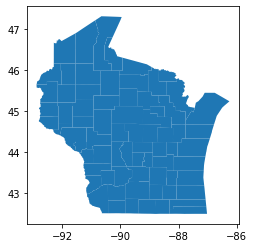

In [56]:
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/State_County/MapServer/1/query?where=STATE%3D055&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
wi = gpd.read_file(url)
wi.plot()

In [73]:
pd.Series([1,2,1,8,8,8,9,5]).value_counts()

8    3
1    2
2    1
9    1
5    1
dtype: int64

In [75]:
pd.Series([1,2,1,8,8,8,9,5]).value_counts().index[0]

8